In [88]:
import pandas as pd
import numpy as np

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
np.random.seed(123)

In [89]:
df = pd.read_csv("../Yoran/combined.csv")
df = df.drop(['Unnamed: 0'],axis=1)
df.Date = pd.to_datetime(df.Date)
df = df.sort_values(by=['Date'])
df = df.set_index(df.Date)
df.head()

,Country/Region,Date,Confirmed,Deaths,Recovered,start_date,lockdown_severity,leasure_shopping_prohibited,maximum_together,mentality_grade,...,apr_temp,may_temp,jun_temp,july_temp,aug_temp,sept_temp,oct_temp,nov_temp,dec_temp,annual_temp
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,Belgium,2020-01-22,0,0,0,3/18/2020,5.0,1,2.0,7.0,...,8.145482,12.398000,15.434529,17.238529,17.183294,14.427412,10.678388,5.761971,3.113924,9.514241
2020-01-22,Denmark,2020-01-22,0,0,0,3/11/2020,5.0,1,10.0,3.0,...,5.867971,10.773036,14.401786,15.891429,15.902357,13.007679,9.359057,4.942146,1.645598,7.818978
2020-01-22,Japan,2020-01-22,2,0,0,4/7/2020,5.0,1,NaN,5.0,...,8.702060,13.524019,17.340918,21.338652,22.744000,18.757239,12.777206,7.053675,1.748080,10.362726
2020-01-22,Netherlands,2020-01-22,0,0,0,3/23/2020,5.0,0,3.0,7.0,...,7.562913,11.983563,14.721875,16.550938,16.639875,13.895625,10.347350,5.916237,3.490613,9.201738
2020-01-22,Ukraine,2020-01-22,0,0,0,3/15/2020,5.7,1,2.0,5.3,...,9.085106,15.090398,18.421490,19.950162,19.344385,14.776107,8.625605,2.807330,-1.976805,8.205566


In [90]:
# X = df[df['Country/Region'] == "Belgium"]
# X

# 1. Feature engineering

##### Add columns

In [91]:
df['Month'] = df['Date'].map(lambda x: 100*x.month)


## NaN handling

In [92]:
#Show all columns that contain Nan values
df.columns[df.isna().any()].tolist()

['maximum_together',
 'hosp_beds_per_1000_2017',
 'ICU-CCB_beds_per_100000',
 'sex_male_to_female_total',
 'first_school_closure_date',
 'airport_traffic_2018_thousands']

In [93]:
# See which countries has NaN values for "Maximum together"
print("{} has NaN value for maximum_together".format(df['Country/Region'][df.maximum_together.isna()].unique()))

# See which countries has NaN values for "hosp_beds_per_1000_2017"
print("{} has NaN value for hosp_beds_per_1000_2017".format(df['Country/Region'][df.hosp_beds_per_1000_2017.isna()].unique()))

# See which countries has NaN values for "CCB_beds_per_100000"
print("{} has NaN value for ICU-CCB_beds_per_100000".format(df['Country/Region'][df['ICU-CCB_beds_per_100000'].isna()].unique()))

# See which countries has NaN values for "sex_male_to_female_total"
print("{} has NaN value for sex_male_to_female_total".format(df['Country/Region'][df.sex_male_to_female_total.isna()].unique()))

#See which country has Nan values for "first_school_closure_date"
print("{} has NaN value for first_school_closure_data_column".format(df['Country/Region'][df.first_school_closure_date.isna()].unique()))

# See which countries has NaN values for "airport_traffic_2018_thousands"
print("{} has NaN value for airport_traffic_2018_thousands".format(df['Country/Region'][df.airport_traffic_2018_thousands.isna()].unique()))


['Japan' 'Croatia'] has NaN value for maximum_together
['Ukraine' 'Croatia' 'North Macedonia'] has NaN value for hosp_beds_per_1000_2017
['Ukraine' 'Croatia' 'Israel' 'North Macedonia'] has NaN value for ICU-CCB_beds_per_100000
['North Macedonia'] has NaN value for sex_male_to_female_total
['United Kingdom'] has NaN value for first_school_closure_data_column
['Denmark' 'North Macedonia'] has NaN value for airport_traffic_2018_thousands


In [94]:
#See with which country this NaN can be replaced
df['Country/Region'].unique()

array(['Belgium', 'Denmark', 'Japan', 'Netherlands', 'Ukraine',
       'Slovenia', 'Germany', 'Ireland', 'United Kingdom', 'Switzerland',
       'Croatia', 'Israel', 'Italy', 'North Macedonia', 'France'],
      dtype=object)

In [95]:
df['maximum_together'][df['Country/Region']=="Croatia"] = df['maximum_together'][df['Country/Region']=="Croatia"].fillna(df['maximum_together'][df['Country/Region']=="Slovenia"])

In [97]:
#Replace NaNs from Croatia with maximum_together from Slovenia 
df['maximum_together'][df['Country/Region']=="Croatia"] = df['maximum_together'][df['Country/Region']=="Croatia"].fillna(df['maximum_together'][df['Country/Region']=="Slovenia"])

#Replace NaNs in maximum_together column in Japan with max value from all columns 
df['maximum_together'] = df['maximum_together'].fillna(df['maximum_together'].max())

#Replace Nans for hosp_beds_per_1000_2017 Ukraine with mean value 
df['hosp_beds_per_1000_2017'][df['Country/Region']=="Ukraine"] = df['hosp_beds_per_1000_2017'][df['Country/Region']=="Ukraine"].fillna(df['hosp_beds_per_1000_2017'].mean())
#Replace Nans for hosp_beds_per_1000_2017 Croatia with values from Slovenia
df['hosp_beds_per_1000_2017'][df['Country/Region']=="Croatia"] = df['hosp_beds_per_1000_2017'][df['Country/Region']=="Croatia"].fillna(df['hosp_beds_per_1000_2017'][df['Country/Region']=="Slovenia"])
#Replace Nans for hosp_beds_per_1000_2017 North Macedonia with values from Slovenia
df['hosp_beds_per_1000_2017'][df['Country/Region']=="North Macedonia"] = df['hosp_beds_per_1000_2017'][df['Country/Region']=="North Macedonia"].fillna(df['hosp_beds_per_1000_2017'][df['Country/Region']=="Slovenia"])

#Replace Nans for ICU-CCB_beds_per_100000 Ukraine with mean value 
df['ICU-CCB_beds_per_100000'][df['Country/Region']=="Ukraine"] = df['ICU-CCB_beds_per_100000'][df['Country/Region']=="Ukraine"].fillna(df['ICU-CCB_beds_per_100000'].mean())
#Replace Nans for ICU-CCB_beds_per_100000 Croatia with values from Slovenia
df['ICU-CCB_beds_per_100000'][df['Country/Region']=="Croatia"] = df['ICU-CCB_beds_per_100000'][df['Country/Region']=="Croatia"].fillna(df['ICU-CCB_beds_per_100000'][df['Country/Region']=="Slovenia"])
#Replace Nans for ICU-CCB_beds_per_100000 North Macedonia with values from Slovenia
df['ICU-CCB_beds_per_100000'][df['Country/Region']=="North Macedonia"] = df['ICU-CCB_beds_per_100000'][df['Country/Region']=="North Macedonia"].fillna(df['ICU-CCB_beds_per_100000'][df['Country/Region']=="Slovenia"])
#Replace Nans for ICU-CCB_beds_per_100000 Israel with mean
df['ICU-CCB_beds_per_100000'][df['Country/Region']=="Israel"] = df['ICU-CCB_beds_per_100000'][df['Country/Region']=="Israel"].fillna(df['ICU-CCB_beds_per_100000'].mean())

#Replace Nans for sex_male_to_female_total North Macedonia with values from Slovenia
df['sex_male_to_female_total'][df['Country/Region']=="North Macedonia"] = df['sex_male_to_female_total'][df['Country/Region']=="North Macedonia"].fillna(df['sex_male_to_female_total'][df['Country/Region']=="Slovenia"])

#Replace Nans for first_school_closure_date UK with values from Ireland
df['first_school_closure_date'] = df['first_school_closure_date'].fillna(df['first_school_closure_date'][df['Country/Region'] == "Ireland"][0])

#Replace Nans for airport_traffic_2018_thousands Denmark with values from Germany
df['airport_traffic_2018_thousands'][df['Country/Region']=="Denmark"] = df['airport_traffic_2018_thousands'][df['Country/Region']=="Denmark"].fillna(df['airport_traffic_2018_thousands'][df['Country/Region']=="Germany"])
#Replace Nans for first_school_closure_date North Macedonai with values from Ireland
df['airport_traffic_2018_thousands'][df['Country/Region']=="North Macedonia"] = df['airport_traffic_2018_thousands'][df['Country/Region']=="North Macedonia"].fillna(df['airport_traffic_2018_thousands'][df['Country/Region']=="Slovenia"])

In [98]:
#Check if all NaN's are correctly replaced
df.columns[df.isna().any()].tolist()

[]

In [99]:
df.to_csv("df_FE.csv")

# 2. Feature selection

In [104]:
df = pd.read_csv("df_FE.csv")
df.Date = pd.to_datetime(df.Date)
df = df.sort_values(by=['Date'])
df = df.set_index(df.Date)
df.head()

,Date,Country/Region,Date.1,Confirmed,Deaths,Recovered,start_date,lockdown_severity,leasure_shopping_prohibited,maximum_together,...,may_temp,jun_temp,july_temp,aug_temp,sept_temp,oct_temp,nov_temp,dec_temp,annual_temp,Month
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,2020-01-22,Belgium,2020-01-22,0,0,0,3/18/2020,5.0,1,2.0,...,12.398000,15.434529,17.238529,17.183294,14.427412,10.678388,5.761971,3.113924,9.514241,100
2020-01-22,2020-01-22,France,2020-01-22,0,0,0,3/16/2020,7.1,1,2.0,...,12.717758,16.097942,18.603865,18.228694,15.782718,11.746692,6.690055,3.865740,10.543722,100
2020-01-22,2020-01-22,North Macedonia,2020-01-22,0,0,0,3/19/2020,7.0,1,2.0,...,13.985727,17.421182,19.846727,19.731727,16.310454,10.784882,5.366073,0.732434,9.853518,100
2020-01-22,2020-01-22,Italy,2020-01-22,0,0,0,3/10/2020,8.0,1,1.0,...,13.777579,17.524698,20.305087,20.144344,17.185813,12.856856,8.012446,4.398412,11.500694,100
2020-01-22,2020-01-22,Israel,2020-01-22,0,0,0,4/2/2020,9.0,1,4.0,...,21.895714,24.751714,26.449429,26.681571,25.123857,22.219000,17.569286,13.401857,19.698000,100


In [105]:
#Put target columns to front
# cols =  df.columns
# cols = list(cols[2:5]) + list(cols[0:2]) + list(cols[5:])
# df = df[cols]
# df.head()

##### Auto encode columns with dtype object

In [106]:
#Show which columns have dtype object
for i in df.columns: 
    if df[i].dtype == object:
        print(i)

Country/Region
Date.1
start_date
covid19_first_date
Urban_pop_pct
first_school_closure_date


In [107]:
label_encoder = LabelEncoder()
df['Country/Region'] = label_encoder.fit_transform(df['Country/Region']).astype('float64')
df['start_date'] = label_encoder.fit_transform(df['start_date']).astype('float64')
df['covid19_first_date'] = label_encoder.fit_transform(df['covid19_first_date']).astype('float64')
df['first_school_closure_date'] = label_encoder.fit_transform(df['first_school_closure_date']).astype('float64')
df['Urban_pop_pct'] = df['Urban_pop_pct'].map(lambda x: x.lstrip('%').rstrip('%')).astype(float)/100

In [108]:
# Show all dtypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1605 entries, 2020-01-22 to 2020-05-07
Data columns (total 64 columns):
 #   Column                                                       Non-Null Count  Dtype         
---  ------                                                       --------------  -----         
 0   Date                                                         1605 non-null   datetime64[ns]
 1   Country/Region                                               1605 non-null   float64       
 2   Date.1                                                       1605 non-null   object        
 3   Confirmed                                                    1605 non-null   int64         
 4   Deaths                                                       1605 non-null   int64         
 5   Recovered                                                    1605 non-null   int64         
 6   start_date                                                   1605 non-null   float64       
 7

##### Convert all dtypes to a float value

In [116]:
df = df.drop(['Date'],axis=1)
df = df.drop(['Date1'],axis=1)

In [117]:
df = df.apply(pd.to_numeric)
df = df.astype(float)
# df.info()

##### Drop columns that are useless and have no variable values

In [119]:
for i in df.columns: 
    if df[i].max() == df[i].mean():
        df = df.drop([i],axis=1)

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

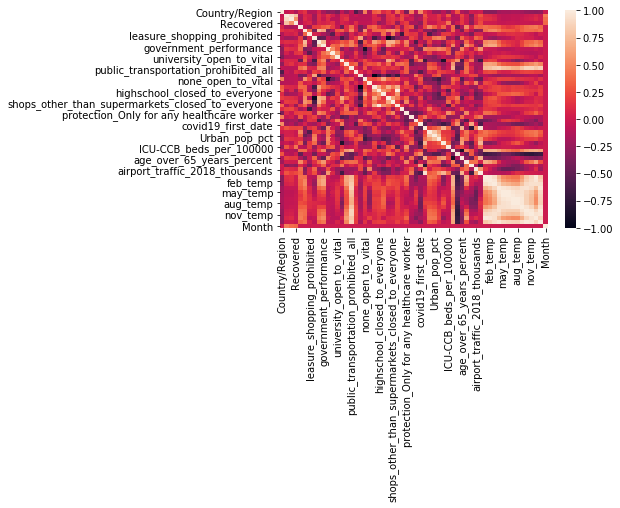

In [121]:
corr = df.corr()
hmap = sns.heatmap(corr)
figure = svm.get_figure()    
figure.savefig('svm_conf.png', dpi=400)

##### Compare correlation between features

In [36]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
dfNew = df[selected_columns] 

In [37]:
dfNew['Deaths'] = df['Deaths']
cols = list(dfNew.columns)
cols = [cols[-1]] + cols[:-1]
dfNew = dfNew[cols]
dfNew.head()

,Deaths,Confirmed,Recovered,Country/Region,Date,start_date,lockdown_severity,leasure_shopping_prohibited,maximum_together,mentality_grade,...,hosp_beds_per_1000_2017,ICU-CCB_beds_per_100000,age_0_to_14_years_percent,age_15_to_64_years_percent,age_over_65_years_percent,sex_male_to_female_total,first_school_closure_date,airport_traffic_2018_thousands,jan_temp,apr_temp
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0.0,0.0,0.0,0.0,1.579651e+18,5.0,5.0,1.0,2.0,7.0,...,5.760000,15.900000,17.1,64.3,18.6,0.97,6.0,1.363949e+07,1.946864,8.145482
2020-01-22,0.0,0.0,0.0,2.0,1.579651e+18,1.0,5.0,1.0,10.0,3.0,...,2.610000,6.700000,16.5,63.8,19.7,0.97,6.0,5.936612e+07,-0.105832,5.867971
2020-01-22,0.0,2.0,0.0,8.0,1.579651e+18,11.0,5.0,1.0,10.0,5.0,...,13.050000,7.300000,12.9,60.1,27.0,0.94,1.0,1.260000e+08,-1.267704,8.702060
2020-01-22,0.0,0.0,0.0,9.0,1.579651e+18,8.0,5.0,0.0,3.0,7.0,...,3.320000,6.400000,16.4,64.8,18.8,0.98,7.0,4.399604e+07,1.993775,7.562913
2020-01-22,0.0,0.0,0.0,13.0,1.579651e+18,2.0,5.7,1.0,2.0,5.3,...,4.954167,10.918182,15.5,68.0,16.5,0.86,3.0,7.854842e+06,-5.150562,9.085106


In [17]:
# df.head()
dfNew.to_csv("Corrected_df.csv")

# Select columns based on P-value

##### Remove columns that you want to predict

Remove Confirmed, Death and Recovered column you want to predict those

In [347]:
corrected = pd.read_csv("Corrected_df.csv")

In [17]:
selected_columns2

['Country/Region',
 'Date',
 'start_date',
 'lockdown_severity',
 'leasure_shopping_prohibited',
 'maximum_together',
 'mentality_grade',
 'government_performance',
 'kindergarten_open_to_vital',
 'highschool_open_to_vital',
 'university_open_to_vital',
 'going_out_for_dinner_prohibited_all',
 'leaving_the_house_for_no_reason_prohibited_all',
 'public_transportation_prohibited_all',
 'sports_games_prohibited_all',
 'hospital_open_to_vital',
 'none_open_to_vital',
 'none__open_to_vital',
 'bars_closed_to_everyone',
 'highschool_closed_to_everyone',
 'kindergarten_closed_to_everyone',
 'restaurants_closed_to_everyone',
 'shops_other_than_supermarkets_closed_to_everyone',
 'protection_Not at all',
 'protection_Only for any healthcare worker',
 'protection_Only for hospital staff',
 'protection_Sufficient for everyone',
 'covid19_first_date',
 'Population_2020',
 'Density_KM2m',
 'Urban_pop_pct',
 'Health_Care_Index',
 'hosp_beds_per_1000_2017',
 'ICU-CCB_beds_per_100000',
 'age_0_to_14_ye

In [12]:
label_columns = []
label_columns.append(list(selected_columns[0:2]))
label_columns = [item for sublist in label_columns for item in sublist]
label_columns.append(dfNew.columns[0])
label_columns

selected_columns2 = list(selected_columns[2:])
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)                  
    regressor_OLS.summary()
    return x, columns
SL = 0.05

#for confirmed caes
data_modeled, selected_columns3 = backwardElimination(dfNew.iloc[:,3:].values, df.iloc[:,0].values, SL, selected_columns2)

In [13]:
result = pd.DataFrame()
result['Confirmed'] = dfNew.iloc[:,2]
result['Recovered'] = df.iloc[:,1]
result['Death'] = dfNew.iloc[:,0]

In [18]:
data = pd.DataFrame(data = data_modeled, columns = selected_columns3)

In [26]:
data[data.index.duplicated()]

,Country/Region,Date,start_date,lockdown_severity,leasure_shopping_prohibited,maximum_together,mentality_grade,government_performance,kindergarten_open_to_vital,highschool_open_to_vital,...,Health_Care_Index,hosp_beds_per_1000_2017,ICU-CCB_beds_per_100000,age_0_to_14_years_percent,age_15_to_64_years_percent,age_over_65_years_percent,sex_male_to_female_total,first_school_closure_date,jan_temp,apr_temp


In [24]:
sns.distplot(data.iloc[0][result['Confirmed']==0], color='g', label = 'benign')

ValueError: cannot reindex from a duplicate axis

TypeError: Cannot index by location index with a non-integer key

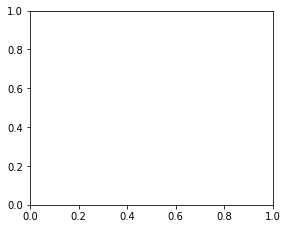

In [23]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(data.iloc[i][result['Confirmed']==0], color='g', label = 'benign')
#     sns.distplot(data[i][result['diagnosis']==1], color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

##### Visualize the selected features

# Breast cancer

In [15]:
bc = pd.read_csv("data.csv")

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [16]:
bc = bc.iloc[:,1:-1]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


##### Transform categorical to numerical

In [17]:
label_encoder = LabelEncoder()
bc.iloc[:,0] = label_encoder.fit_transform(bc.iloc[:,0]).astype('float64')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1.0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1.0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1.0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1.0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


##### Set correlation matrix

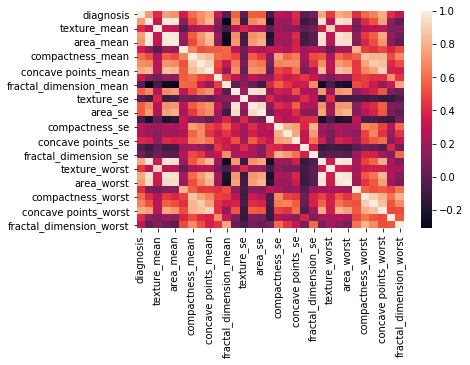

In [18]:
corr = bc.corr()
sns.heatmap(corr)

In [20]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = bc.columns[columns]
bc = bc[selected_columns]

In [24]:
selected_columns = list(selected_columns[1:])
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns = backwardElimination(bc.iloc[:,1:].values, bc.iloc[:,0].values, SL, selected_columns)

In [26]:
result = pd.DataFrame()
result['diagnosis'] = bc.iloc[:,0]

In [27]:
bc.iloc[:,1:].values

array([[17.99   , 10.38   ,  0.1184 , ...,  0.7119 ,  0.4601 ,  0.1189 ],
       [20.57   , 17.77   ,  0.08474, ...,  0.2416 ,  0.275  ,  0.08902],
       [19.69   , 21.25   ,  0.1096 , ...,  0.4504 ,  0.3613 ,  0.08758],
       ...,
       [16.6    , 28.08   ,  0.08455, ...,  0.3403 ,  0.2218 ,  0.0782 ],
       [20.6    , 29.33   ,  0.1178 , ...,  0.9387 ,  0.4087 ,  0.124  ],
       [ 7.76   , 24.54   ,  0.05263, ...,  0.     ,  0.2871 ,  0.07039]])

In [29]:
df.iloc[:,3:].values

array([[Timestamp('2020-01-22 00:00:00'), '3/18/2020', 5.0, ...,
        5.76197057647, 3.11392355706, 9.51424127412],
       [Timestamp('2020-01-23 00:00:00'), '3/18/2020', 5.0, ...,
        5.76197057647, 3.11392355706, 9.51424127412],
       [Timestamp('2020-01-24 00:00:00'), '3/18/2020', 5.0, ...,
        5.76197057647, 3.11392355706, 9.51424127412],
       ...,
       [Timestamp('2020-05-05 00:00:00'), '3/23/2020', 7.0, ...,
        5.52406241519, 3.84917216872, 8.3102391391],
       [Timestamp('2020-05-06 00:00:00'), '3/23/2020', 7.0, ...,
        5.52406241519, 3.84917216872, 8.3102391391],
       [Timestamp('2020-05-07 00:00:00'), '3/23/2020', 7.0, ...,
        5.52406241519, 3.84917216872, 8.3102391391]], dtype=object)